# Simulated Annealing TSP

### Set-up and Framework

In [8]:
#IMPORTS
import time
import random
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import spatial
import copy
import operator
import pandas as pd



In [9]:
#READ IN FILE TO LIST

def att48_to_nx3_list(filename):

    with open(filename) as f:
        att48 = f.readlines()

    #Rejects document text 
    pre_size = len(att48)
    att48 =att48[6:pre_size-1] 
    post_size = len(att48)
    
    #separates and splits numbers into list array[cityNUM, xcoord, ycoord]
    #split each line into 3 colums cityID, x_coord, y_coord
    for i in range (post_size):
        att48[i] = att48[i].split()
    
    #Convert all strings in array to ints 
    for i in range (post_size):
        att48[i][0] = int(att48[i][0])
        att48[i][1] = int(att48[i][1])
        att48[i][2] = int(att48[i][2])
         
    return att48

def plot_cities(cities_list):
    
    cityIDs = []
    x = []
    y = []
        
    for i in range (len(cities_list)):
        cityIDs.append(cities_list[i][0])
        x.append(cities_list[i][1])
        y.append(cities_list[i][2])
    
    plt.plot(x, y, 'k-')
    plt.show()


def read_optimum_tour_index(opt_file):
    

    with open(opt_file) as f:
        att48 = f.readlines()
        
    #Rejects document text 
    pre_size = len(att48)
    att48 =att48[5:pre_size-2] 
    post_size = len(att48)
    
    #separates and splits numbers into list array[cityNUM, xcoord, ycoord]
    
    #split each line into 3 colums cityID, x_coord, y_coord
    for i in range (post_size):
        att48[i] = att48[i].split()
    
    #Convert all strings in array to ints 
    for i in range (post_size):
        att48[i][0]= int(att48[i][0])
           
    return att48


def sort_to_index(cities, index):
    
    #intilize list
    sorted_cities = []
    
    #initilze list size
    for i in range (len(index)):
        sorted_cities.append([0,0,0])
        
    #rearrange city index to optimum solution
    for i in range (len(index)):
        sorted_cities[i][0] = cities[index[i][0]-1][0]
        sorted_cities[i][1] = cities[index[i][0]-1][1]
        sorted_cities[i][2] = cities[index[i][0]-1][2]
    
    return sorted_cities


def pseudo_euclidean_distance(point_1, point_2):
    
    x1 = point_1[0]
    y1 = point_1[1]
    x2 = point_2[0]
    y2 = point_2[1]
    
    xd = x1 - x2;
    yd = y1 - y2;
    rij = (((xd*xd + yd*yd)/10.0)**(1/2))
    tij = np.rint(rij);
    
    if (tij<rij):
        dij = tij + 1;
    else:
        dij = tij;
    
    return dij


def cal_tour_distance(tour_solution): 
    Total_distance = 0
    
    new_tour_sol = tour_solution
        
    for i in range (len(new_tour_sol)-1):
        
        x1 = new_tour_sol[i][1]
        y1 = new_tour_sol[i][2]
        x2 = new_tour_sol[i+1][1]
        y2 = new_tour_sol[i+1][2]
        
        point_1 = [x1, y1]
        point_2 = [x2, y2]
        
        Total_distance = Total_distance + pseudo_euclidean_distance(point_1, point_2)
        
    return Total_distance


#probabilty of accepting worse solution 
def cal_probabilty_accept(temperature, tour_best, tour_new):
    return math.exp((tour_best-tour_new)/temperature)

# Simulated Annealing

In [10]:

def simulated_annealing(cities_array, T, T_alpha, iterations):
    
    #the order in which the cities are in the array, defines the tour for the intial solution
    init_sol = copy.copy(cities_array)
    
    #add the start city to the end to complete circuit of the TSP
    init_sol.append(init_sol[0])
    
    #best solution is initially the first solution
    best_solution = init_sol
    best_tour_distance = cal_tour_distance(cities_array)

    #length of soultion (this never changes)
    start = 0
    stop = len(best_solution)-1  #(minus one so we dont over shoot the array and choose a naigbour that doesn't exist)
    step_size = 1
    
    
    for i in range (iterations):
        rand_city1 = random.randrange(start, stop, step_size)
        rand_city2 = random.randrange(start, stop, step_size)
        

        new_solution = naigbour_swap(best_solution, rand_city1,rand_city2)
        new_tour_distance = cal_tour_distance(new_solution)

        
        if (new_tour_distance < best_tour_distance):
            best_tour_distance = new_tour_distance
            best_solution = copy.copy(new_solution)
            
        else:
            P_accept = cal_probabilty_accept(T,best_tour_distance, new_tour_distance)
            P = random.uniform(0,1)
            if (P_accept > P):
                best_tour_distance = new_tour_distance
                best_solution = copy.copy(new_solution)
                
                
        T = T- T_alpha
        print("n", i, "Temp ",T)
        if (T < 0.000001):
            break
            
            
            
    return best_tour_distance, best_solution
            
          
def naigbour_swap(current_best_solution, rand_city1,rand_city2 ):
    
    random_selected_city = current_best_solution[rand_city1]
    adjacent_city =  current_best_solution[rand_city2]
        
    new_solution = []
    
    new_solution = copy.copy(current_best_solution)
        
    #Swap the cities around
    new_solution[rand_city1] = adjacent_city
    new_solution[rand_city2] = random_selected_city
    
    return new_solution


n 0 Temp  109.99
n 1 Temp  109.97999999999999
n 2 Temp  109.96999999999998
n 3 Temp  109.95999999999998
n 4 Temp  109.94999999999997
n 5 Temp  109.93999999999997
n 6 Temp  109.92999999999996
n 7 Temp  109.91999999999996
n 8 Temp  109.90999999999995
n 9 Temp  109.89999999999995
n 10 Temp  109.88999999999994
n 11 Temp  109.87999999999994
n 12 Temp  109.86999999999993
n 13 Temp  109.85999999999993
n 14 Temp  109.84999999999992
n 15 Temp  109.83999999999992
n 16 Temp  109.82999999999991
n 17 Temp  109.81999999999991
n 18 Temp  109.8099999999999
n 19 Temp  109.7999999999999
n 20 Temp  109.78999999999989
n 21 Temp  109.77999999999989
n 22 Temp  109.76999999999988
n 23 Temp  109.75999999999988
n 24 Temp  109.74999999999987
n 25 Temp  109.73999999999987
n 26 Temp  109.72999999999986
n 27 Temp  109.71999999999986
n 28 Temp  109.70999999999985
n 29 Temp  109.69999999999985
n 30 Temp  109.68999999999984
n 31 Temp  109.67999999999984
n 32 Temp  109.66999999999983
n 33 Temp  109.65999999999983
n 34

n 301 Temp  106.97999999999845
n 302 Temp  106.96999999999845
n 303 Temp  106.95999999999844
n 304 Temp  106.94999999999844
n 305 Temp  106.93999999999843
n 306 Temp  106.92999999999843
n 307 Temp  106.91999999999842
n 308 Temp  106.90999999999842
n 309 Temp  106.89999999999841
n 310 Temp  106.88999999999841
n 311 Temp  106.8799999999984
n 312 Temp  106.8699999999984
n 313 Temp  106.8599999999984
n 314 Temp  106.84999999999839
n 315 Temp  106.83999999999838
n 316 Temp  106.82999999999838
n 317 Temp  106.81999999999837
n 318 Temp  106.80999999999837
n 319 Temp  106.79999999999836
n 320 Temp  106.78999999999836
n 321 Temp  106.77999999999835
n 322 Temp  106.76999999999835
n 323 Temp  106.75999999999834
n 324 Temp  106.74999999999834
n 325 Temp  106.73999999999833
n 326 Temp  106.72999999999833
n 327 Temp  106.71999999999832
n 328 Temp  106.70999999999832
n 329 Temp  106.69999999999831
n 330 Temp  106.6899999999983
n 331 Temp  106.6799999999983
n 332 Temp  106.6699999999983
n 333 Temp  10

n 739 Temp  102.59999999999621
n 740 Temp  102.58999999999621
n 741 Temp  102.5799999999962
n 742 Temp  102.5699999999962
n 743 Temp  102.5599999999962
n 744 Temp  102.54999999999619
n 745 Temp  102.53999999999618
n 746 Temp  102.52999999999618
n 747 Temp  102.51999999999617
n 748 Temp  102.50999999999617
n 749 Temp  102.49999999999616
n 750 Temp  102.48999999999616
n 751 Temp  102.47999999999615
n 752 Temp  102.46999999999615
n 753 Temp  102.45999999999614
n 754 Temp  102.44999999999614
n 755 Temp  102.43999999999613
n 756 Temp  102.42999999999613
n 757 Temp  102.41999999999612
n 758 Temp  102.40999999999612
n 759 Temp  102.39999999999611
n 760 Temp  102.3899999999961
n 761 Temp  102.3799999999961
n 762 Temp  102.3699999999961
n 763 Temp  102.35999999999609
n 764 Temp  102.34999999999609
n 765 Temp  102.33999999999608
n 766 Temp  102.32999999999608
n 767 Temp  102.31999999999607
n 768 Temp  102.30999999999607
n 769 Temp  102.29999999999606
n 770 Temp  102.28999999999606
n 771 Temp  10

n 1234 Temp  97.64999999999368
n 1235 Temp  97.63999999999368
n 1236 Temp  97.62999999999367
n 1237 Temp  97.61999999999367
n 1238 Temp  97.60999999999366
n 1239 Temp  97.59999999999366
n 1240 Temp  97.58999999999365
n 1241 Temp  97.57999999999365
n 1242 Temp  97.56999999999364
n 1243 Temp  97.55999999999364
n 1244 Temp  97.54999999999363
n 1245 Temp  97.53999999999363
n 1246 Temp  97.52999999999362
n 1247 Temp  97.51999999999362
n 1248 Temp  97.50999999999361
n 1249 Temp  97.4999999999936
n 1250 Temp  97.4899999999936
n 1251 Temp  97.4799999999936
n 1252 Temp  97.46999999999359
n 1253 Temp  97.45999999999358
n 1254 Temp  97.44999999999358
n 1255 Temp  97.43999999999357
n 1256 Temp  97.42999999999357
n 1257 Temp  97.41999999999356
n 1258 Temp  97.40999999999356
n 1259 Temp  97.39999999999355
n 1260 Temp  97.38999999999355
n 1261 Temp  97.37999999999354
n 1262 Temp  97.36999999999354
n 1263 Temp  97.35999999999353
n 1264 Temp  97.34999999999353
n 1265 Temp  97.33999999999352
n 1266 Temp

n 1701 Temp  92.97999999999129
n 1702 Temp  92.96999999999129
n 1703 Temp  92.95999999999128
n 1704 Temp  92.94999999999128
n 1705 Temp  92.93999999999127
n 1706 Temp  92.92999999999127
n 1707 Temp  92.91999999999126
n 1708 Temp  92.90999999999126
n 1709 Temp  92.89999999999125
n 1710 Temp  92.88999999999125
n 1711 Temp  92.87999999999124
n 1712 Temp  92.86999999999124
n 1713 Temp  92.85999999999123
n 1714 Temp  92.84999999999123
n 1715 Temp  92.83999999999122
n 1716 Temp  92.82999999999122
n 1717 Temp  92.81999999999121
n 1718 Temp  92.8099999999912
n 1719 Temp  92.7999999999912
n 1720 Temp  92.7899999999912
n 1721 Temp  92.77999999999119
n 1722 Temp  92.76999999999119
n 1723 Temp  92.75999999999118
n 1724 Temp  92.74999999999118
n 1725 Temp  92.73999999999117
n 1726 Temp  92.72999999999116
n 1727 Temp  92.71999999999116
n 1728 Temp  92.70999999999115
n 1729 Temp  92.69999999999115
n 1730 Temp  92.68999999999114
n 1731 Temp  92.67999999999114
n 1732 Temp  92.66999999999113
n 1733 Temp

n 2174 Temp  88.24999999998887
n 2175 Temp  88.23999999998887
n 2176 Temp  88.22999999998886
n 2177 Temp  88.21999999998886
n 2178 Temp  88.20999999998885
n 2179 Temp  88.19999999998885
n 2180 Temp  88.18999999998884
n 2181 Temp  88.17999999998884
n 2182 Temp  88.16999999998883
n 2183 Temp  88.15999999998883
n 2184 Temp  88.14999999998882
n 2185 Temp  88.13999999998882
n 2186 Temp  88.12999999998881
n 2187 Temp  88.1199999999888
n 2188 Temp  88.1099999999888
n 2189 Temp  88.0999999999888
n 2190 Temp  88.08999999998879
n 2191 Temp  88.07999999998879
n 2192 Temp  88.06999999998878
n 2193 Temp  88.05999999998878
n 2194 Temp  88.04999999998877
n 2195 Temp  88.03999999998877
n 2196 Temp  88.02999999998876
n 2197 Temp  88.01999999998876
n 2198 Temp  88.00999999998875
n 2199 Temp  87.99999999998875
n 2200 Temp  87.98999999998874
n 2201 Temp  87.97999999998873
n 2202 Temp  87.96999999998873
n 2203 Temp  87.95999999998872
n 2204 Temp  87.94999999998872
n 2205 Temp  87.93999999998871
n 2206 Temp

n 2625 Temp  83.73999999998657
n 2626 Temp  83.72999999998656
n 2627 Temp  83.71999999998656
n 2628 Temp  83.70999999998655
n 2629 Temp  83.69999999998655
n 2630 Temp  83.68999999998654
n 2631 Temp  83.67999999998653
n 2632 Temp  83.66999999998653
n 2633 Temp  83.65999999998652
n 2634 Temp  83.64999999998652
n 2635 Temp  83.63999999998651
n 2636 Temp  83.62999999998651
n 2637 Temp  83.6199999999865
n 2638 Temp  83.6099999999865
n 2639 Temp  83.5999999999865
n 2640 Temp  83.58999999998649
n 2641 Temp  83.57999999998648
n 2642 Temp  83.56999999998648
n 2643 Temp  83.55999999998647
n 2644 Temp  83.54999999998647
n 2645 Temp  83.53999999998646
n 2646 Temp  83.52999999998646
n 2647 Temp  83.51999999998645
n 2648 Temp  83.50999999998645
n 2649 Temp  83.49999999998644
n 2650 Temp  83.48999999998644
n 2651 Temp  83.47999999998643
n 2652 Temp  83.46999999998643
n 2653 Temp  83.45999999998642
n 2654 Temp  83.44999999998642
n 2655 Temp  83.43999999998641
n 2656 Temp  83.4299999999864
n 2657 Temp 

n 3034 Temp  79.64999999998447
n 3035 Temp  79.63999999998447
n 3036 Temp  79.62999999998446
n 3037 Temp  79.61999999998446
n 3038 Temp  79.60999999998445
n 3039 Temp  79.59999999998445
n 3040 Temp  79.58999999998444
n 3041 Temp  79.57999999998444
n 3042 Temp  79.56999999998443
n 3043 Temp  79.55999999998443
n 3044 Temp  79.54999999998442
n 3045 Temp  79.53999999998442
n 3046 Temp  79.52999999998441
n 3047 Temp  79.5199999999844
n 3048 Temp  79.5099999999844
n 3049 Temp  79.4999999999844
n 3050 Temp  79.48999999998439
n 3051 Temp  79.47999999998439
n 3052 Temp  79.46999999998438
n 3053 Temp  79.45999999998438
n 3054 Temp  79.44999999998437
n 3055 Temp  79.43999999998437
n 3056 Temp  79.42999999998436
n 3057 Temp  79.41999999998436
n 3058 Temp  79.40999999998435
n 3059 Temp  79.39999999998435
n 3060 Temp  79.38999999998434
n 3061 Temp  79.37999999998434
n 3062 Temp  79.36999999998433
n 3063 Temp  79.35999999998432
n 3064 Temp  79.34999999998432
n 3065 Temp  79.33999999998431
n 3066 Temp

n 3498 Temp  75.0099999999821
n 3499 Temp  74.9999999999821
n 3500 Temp  74.98999999998209
n 3501 Temp  74.97999999998208
n 3502 Temp  74.96999999998208
n 3503 Temp  74.95999999998207
n 3504 Temp  74.94999999998207
n 3505 Temp  74.93999999998206
n 3506 Temp  74.92999999998206
n 3507 Temp  74.91999999998205
n 3508 Temp  74.90999999998205
n 3509 Temp  74.89999999998204
n 3510 Temp  74.88999999998204
n 3511 Temp  74.87999999998203
n 3512 Temp  74.86999999998203
n 3513 Temp  74.85999999998202
n 3514 Temp  74.84999999998202
n 3515 Temp  74.83999999998201
n 3516 Temp  74.82999999998201
n 3517 Temp  74.819999999982
n 3518 Temp  74.809999999982
n 3519 Temp  74.79999999998199
n 3520 Temp  74.78999999998199
n 3521 Temp  74.77999999998198
n 3522 Temp  74.76999999998198
n 3523 Temp  74.75999999998197
n 3524 Temp  74.74999999998197
n 3525 Temp  74.73999999998196
n 3526 Temp  74.72999999998196
n 3527 Temp  74.71999999998195
n 3528 Temp  74.70999999998195
n 3529 Temp  74.69999999998194
n 3530 Temp  7

n 3955 Temp  70.43999999997976
n 3956 Temp  70.42999999997976
n 3957 Temp  70.41999999997975
n 3958 Temp  70.40999999997975
n 3959 Temp  70.39999999997974
n 3960 Temp  70.38999999997974
n 3961 Temp  70.37999999997973
n 3962 Temp  70.36999999997973
n 3963 Temp  70.35999999997972
n 3964 Temp  70.34999999997972
n 3965 Temp  70.33999999997971
n 3966 Temp  70.3299999999797
n 3967 Temp  70.3199999999797
n 3968 Temp  70.3099999999797
n 3969 Temp  70.29999999997969
n 3970 Temp  70.28999999997968
n 3971 Temp  70.27999999997968
n 3972 Temp  70.26999999997967
n 3973 Temp  70.25999999997967
n 3974 Temp  70.24999999997966
n 3975 Temp  70.23999999997966
n 3976 Temp  70.22999999997965
n 3977 Temp  70.21999999997965
n 3978 Temp  70.20999999997964
n 3979 Temp  70.19999999997964
n 3980 Temp  70.18999999997963
n 3981 Temp  70.17999999997963
n 3982 Temp  70.16999999997962
n 3983 Temp  70.15999999997962
n 3984 Temp  70.14999999997961
n 3985 Temp  70.13999999997961
n 3986 Temp  70.1299999999796
n 3987 Temp 

n 4411 Temp  65.87999999997743
n 4412 Temp  65.86999999997742
n 4413 Temp  65.85999999997742
n 4414 Temp  65.84999999997741
n 4415 Temp  65.83999999997741
n 4416 Temp  65.8299999999774
n 4417 Temp  65.8199999999774
n 4418 Temp  65.80999999997739
n 4419 Temp  65.79999999997739
n 4420 Temp  65.78999999997738
n 4421 Temp  65.77999999997738
n 4422 Temp  65.76999999997737
n 4423 Temp  65.75999999997737
n 4424 Temp  65.74999999997736
n 4425 Temp  65.73999999997736
n 4426 Temp  65.72999999997735
n 4427 Temp  65.71999999997735
n 4428 Temp  65.70999999997734
n 4429 Temp  65.69999999997734
n 4430 Temp  65.68999999997733
n 4431 Temp  65.67999999997733
n 4432 Temp  65.66999999997732
n 4433 Temp  65.65999999997732
n 4434 Temp  65.64999999997731
n 4435 Temp  65.6399999999773
n 4436 Temp  65.6299999999773
n 4437 Temp  65.6199999999773
n 4438 Temp  65.60999999997729
n 4439 Temp  65.59999999997729
n 4440 Temp  65.58999999997728
n 4441 Temp  65.57999999997728
n 4442 Temp  65.56999999997727
n 4443 Temp  

n 4878 Temp  61.20999999997703
n 4879 Temp  61.19999999997703
n 4880 Temp  61.18999999997703
n 4881 Temp  61.179999999977035
n 4882 Temp  61.16999999997704
n 4883 Temp  61.15999999997704
n 4884 Temp  61.14999999997704
n 4885 Temp  61.13999999997704
n 4886 Temp  61.129999999977045
n 4887 Temp  61.11999999997705
n 4888 Temp  61.10999999997705
n 4889 Temp  61.09999999997705
n 4890 Temp  61.08999999997705
n 4891 Temp  61.079999999977055
n 4892 Temp  61.06999999997706
n 4893 Temp  61.05999999997706
n 4894 Temp  61.04999999997706
n 4895 Temp  61.03999999997706
n 4896 Temp  61.029999999977065
n 4897 Temp  61.01999999997707
n 4898 Temp  61.00999999997707
n 4899 Temp  60.99999999997707
n 4900 Temp  60.98999999997707
n 4901 Temp  60.979999999977075
n 4902 Temp  60.96999999997708
n 4903 Temp  60.95999999997708
n 4904 Temp  60.94999999997708
n 4905 Temp  60.93999999997708
n 4906 Temp  60.929999999977085
n 4907 Temp  60.91999999997709
n 4908 Temp  60.90999999997709
n 4909 Temp  60.89999999997709
n 

n 5327 Temp  56.71999999997792
n 5328 Temp  56.709999999977924
n 5329 Temp  56.699999999977926
n 5330 Temp  56.68999999997793
n 5331 Temp  56.67999999997793
n 5332 Temp  56.66999999997793
n 5333 Temp  56.659999999977934
n 5334 Temp  56.649999999977936
n 5335 Temp  56.63999999997794
n 5336 Temp  56.62999999997794
n 5337 Temp  56.61999999997794
n 5338 Temp  56.609999999977944
n 5339 Temp  56.599999999977946
n 5340 Temp  56.58999999997795
n 5341 Temp  56.57999999997795
n 5342 Temp  56.56999999997795
n 5343 Temp  56.559999999977954
n 5344 Temp  56.549999999977956
n 5345 Temp  56.53999999997796
n 5346 Temp  56.52999999997796
n 5347 Temp  56.51999999997796
n 5348 Temp  56.509999999977964
n 5349 Temp  56.499999999977966
n 5350 Temp  56.48999999997797
n 5351 Temp  56.47999999997797
n 5352 Temp  56.46999999997797
n 5353 Temp  56.459999999977974
n 5354 Temp  56.449999999977976
n 5355 Temp  56.43999999997798
n 5356 Temp  56.42999999997798
n 5357 Temp  56.41999999997798
n 5358 Temp  56.40999999997

n 5794 Temp  52.04999999997885
n 5795 Temp  52.03999999997885
n 5796 Temp  52.029999999978855
n 5797 Temp  52.01999999997886
n 5798 Temp  52.00999999997886
n 5799 Temp  51.99999999997886
n 5800 Temp  51.98999999997886
n 5801 Temp  51.979999999978865
n 5802 Temp  51.96999999997887
n 5803 Temp  51.95999999997887
n 5804 Temp  51.94999999997887
n 5805 Temp  51.93999999997887
n 5806 Temp  51.929999999978875
n 5807 Temp  51.91999999997888
n 5808 Temp  51.90999999997888
n 5809 Temp  51.89999999997888
n 5810 Temp  51.88999999997888
n 5811 Temp  51.879999999978885
n 5812 Temp  51.86999999997889
n 5813 Temp  51.85999999997889
n 5814 Temp  51.84999999997889
n 5815 Temp  51.83999999997889
n 5816 Temp  51.829999999978895
n 5817 Temp  51.8199999999789
n 5818 Temp  51.8099999999789
n 5819 Temp  51.7999999999789
n 5820 Temp  51.7899999999789
n 5821 Temp  51.779999999978905
n 5822 Temp  51.76999999997891
n 5823 Temp  51.75999999997891
n 5824 Temp  51.74999999997891
n 5825 Temp  51.73999999997891
n 5826

n 6261 Temp  47.37999999997978
n 6262 Temp  47.36999999997978
n 6263 Temp  47.359999999979784
n 6264 Temp  47.34999999997979
n 6265 Temp  47.33999999997979
n 6266 Temp  47.32999999997979
n 6267 Temp  47.31999999997979
n 6268 Temp  47.309999999979794
n 6269 Temp  47.299999999979796
n 6270 Temp  47.2899999999798
n 6271 Temp  47.2799999999798
n 6272 Temp  47.2699999999798
n 6273 Temp  47.259999999979804
n 6274 Temp  47.249999999979806
n 6275 Temp  47.23999999997981
n 6276 Temp  47.22999999997981
n 6277 Temp  47.21999999997981
n 6278 Temp  47.209999999979814
n 6279 Temp  47.199999999979816
n 6280 Temp  47.18999999997982
n 6281 Temp  47.17999999997982
n 6282 Temp  47.16999999997982
n 6283 Temp  47.159999999979824
n 6284 Temp  47.149999999979826
n 6285 Temp  47.13999999997983
n 6286 Temp  47.12999999997983
n 6287 Temp  47.11999999997983
n 6288 Temp  47.109999999979834
n 6289 Temp  47.099999999979836
n 6290 Temp  47.08999999997984
n 6291 Temp  47.07999999997984
n 6292 Temp  47.06999999997984


n 6721 Temp  42.779999999980696
n 6722 Temp  42.7699999999807
n 6723 Temp  42.7599999999807
n 6724 Temp  42.7499999999807
n 6725 Temp  42.739999999980704
n 6726 Temp  42.729999999980706
n 6727 Temp  42.71999999998071
n 6728 Temp  42.70999999998071
n 6729 Temp  42.69999999998071
n 6730 Temp  42.689999999980714
n 6731 Temp  42.679999999980716
n 6732 Temp  42.66999999998072
n 6733 Temp  42.65999999998072
n 6734 Temp  42.64999999998072
n 6735 Temp  42.63999999998072
n 6736 Temp  42.629999999980726
n 6737 Temp  42.61999999998073
n 6738 Temp  42.60999999998073
n 6739 Temp  42.59999999998073
n 6740 Temp  42.58999999998073
n 6741 Temp  42.579999999980735
n 6742 Temp  42.56999999998074
n 6743 Temp  42.55999999998074
n 6744 Temp  42.54999999998074
n 6745 Temp  42.53999999998074
n 6746 Temp  42.529999999980745
n 6747 Temp  42.51999999998075
n 6748 Temp  42.50999999998075
n 6749 Temp  42.49999999998075
n 6750 Temp  42.48999999998075
n 6751 Temp  42.479999999980755
n 6752 Temp  42.46999999998076
n 

n 7169 Temp  38.29999999998159
n 7170 Temp  38.28999999998159
n 7171 Temp  38.27999999998159
n 7172 Temp  38.26999999998159
n 7173 Temp  38.259999999981595
n 7174 Temp  38.2499999999816
n 7175 Temp  38.2399999999816
n 7176 Temp  38.2299999999816
n 7177 Temp  38.2199999999816
n 7178 Temp  38.209999999981605
n 7179 Temp  38.19999999998161
n 7180 Temp  38.18999999998161
n 7181 Temp  38.17999999998161
n 7182 Temp  38.16999999998161
n 7183 Temp  38.159999999981615
n 7184 Temp  38.14999999998162
n 7185 Temp  38.13999999998162
n 7186 Temp  38.12999999998162
n 7187 Temp  38.11999999998162
n 7188 Temp  38.109999999981625
n 7189 Temp  38.09999999998163
n 7190 Temp  38.08999999998163
n 7191 Temp  38.07999999998163
n 7192 Temp  38.06999999998163
n 7193 Temp  38.059999999981635
n 7194 Temp  38.04999999998164
n 7195 Temp  38.03999999998164
n 7196 Temp  38.02999999998164
n 7197 Temp  38.01999999998164
n 7198 Temp  38.009999999981645
n 7199 Temp  37.99999999998165
n 7200 Temp  37.98999999998165
n 7201

n 7621 Temp  33.779999999982486
n 7622 Temp  33.76999999998249
n 7623 Temp  33.75999999998249
n 7624 Temp  33.74999999998249
n 7625 Temp  33.739999999982494
n 7626 Temp  33.729999999982496
n 7627 Temp  33.7199999999825
n 7628 Temp  33.7099999999825
n 7629 Temp  33.6999999999825
n 7630 Temp  33.689999999982504
n 7631 Temp  33.679999999982506
n 7632 Temp  33.66999999998251
n 7633 Temp  33.65999999998251
n 7634 Temp  33.64999999998251
n 7635 Temp  33.639999999982514
n 7636 Temp  33.629999999982516
n 7637 Temp  33.61999999998252
n 7638 Temp  33.60999999998252
n 7639 Temp  33.59999999998252
n 7640 Temp  33.589999999982524
n 7641 Temp  33.579999999982526
n 7642 Temp  33.56999999998253
n 7643 Temp  33.55999999998253
n 7644 Temp  33.54999999998253
n 7645 Temp  33.539999999982534
n 7646 Temp  33.529999999982536
n 7647 Temp  33.51999999998254
n 7648 Temp  33.50999999998254
n 7649 Temp  33.49999999998254
n 7650 Temp  33.489999999982544
n 7651 Temp  33.479999999982546
n 7652 Temp  33.4699999999825

n 8073 Temp  29.25999999998241
n 8074 Temp  29.249999999982407
n 8075 Temp  29.239999999982405
n 8076 Temp  29.229999999982404
n 8077 Temp  29.219999999982402
n 8078 Temp  29.2099999999824
n 8079 Temp  29.1999999999824
n 8080 Temp  29.189999999982398
n 8081 Temp  29.179999999982396
n 8082 Temp  29.169999999982394
n 8083 Temp  29.159999999982393
n 8084 Temp  29.14999999998239
n 8085 Temp  29.13999999998239
n 8086 Temp  29.129999999982388
n 8087 Temp  29.119999999982387
n 8088 Temp  29.109999999982385
n 8089 Temp  29.099999999982384
n 8090 Temp  29.089999999982382
n 8091 Temp  29.07999999998238
n 8092 Temp  29.06999999998238
n 8093 Temp  29.059999999982377
n 8094 Temp  29.049999999982376
n 8095 Temp  29.039999999982374
n 8096 Temp  29.029999999982373
n 8097 Temp  29.01999999998237
n 8098 Temp  29.00999999998237
n 8099 Temp  28.999999999982368
n 8100 Temp  28.989999999982366
n 8101 Temp  28.979999999982365
n 8102 Temp  28.969999999982363
n 8103 Temp  28.95999999998236
n 8104 Temp  28.9499

n 8537 Temp  24.619999999981683
n 8538 Temp  24.60999999998168
n 8539 Temp  24.59999999998168
n 8540 Temp  24.58999999998168
n 8541 Temp  24.579999999981677
n 8542 Temp  24.569999999981675
n 8543 Temp  24.559999999981674
n 8544 Temp  24.549999999981672
n 8545 Temp  24.53999999998167
n 8546 Temp  24.52999999998167
n 8547 Temp  24.519999999981668
n 8548 Temp  24.509999999981666
n 8549 Temp  24.499999999981664
n 8550 Temp  24.489999999981663
n 8551 Temp  24.47999999998166
n 8552 Temp  24.46999999998166
n 8553 Temp  24.459999999981658
n 8554 Temp  24.449999999981657
n 8555 Temp  24.439999999981655
n 8556 Temp  24.429999999981654
n 8557 Temp  24.419999999981652
n 8558 Temp  24.40999999998165
n 8559 Temp  24.39999999998165
n 8560 Temp  24.389999999981647
n 8561 Temp  24.379999999981646
n 8562 Temp  24.369999999981644
n 8563 Temp  24.359999999981643
n 8564 Temp  24.34999999998164
n 8565 Temp  24.33999999998164
n 8566 Temp  24.329999999981638
n 8567 Temp  24.319999999981636
n 8568 Temp  24.309

n 8996 Temp  20.029999999980966
n 8997 Temp  20.019999999980964
n 8998 Temp  20.009999999980963
n 8999 Temp  19.99999999998096
n 9000 Temp  19.98999999998096
n 9001 Temp  19.979999999980958
n 9002 Temp  19.969999999980956
n 9003 Temp  19.959999999980955
n 9004 Temp  19.949999999980953
n 9005 Temp  19.93999999998095
n 9006 Temp  19.92999999998095
n 9007 Temp  19.91999999998095
n 9008 Temp  19.909999999980947
n 9009 Temp  19.899999999980945
n 9010 Temp  19.889999999980944
n 9011 Temp  19.879999999980942
n 9012 Temp  19.86999999998094
n 9013 Temp  19.85999999998094
n 9014 Temp  19.849999999980938
n 9015 Temp  19.839999999980936
n 9016 Temp  19.829999999980934
n 9017 Temp  19.819999999980933
n 9018 Temp  19.80999999998093
n 9019 Temp  19.79999999998093
n 9020 Temp  19.789999999980928
n 9021 Temp  19.779999999980927
n 9022 Temp  19.769999999980925
n 9023 Temp  19.759999999980923
n 9024 Temp  19.749999999980922
n 9025 Temp  19.73999999998092
n 9026 Temp  19.72999999998092
n 9027 Temp  19.719

n 9463 Temp  15.359999999980351
n 9464 Temp  15.349999999980351
n 9465 Temp  15.339999999980352
n 9466 Temp  15.329999999980352
n 9467 Temp  15.319999999980352
n 9468 Temp  15.309999999980352
n 9469 Temp  15.299999999980352
n 9470 Temp  15.289999999980353
n 9471 Temp  15.279999999980353
n 9472 Temp  15.269999999980353
n 9473 Temp  15.259999999980353
n 9474 Temp  15.249999999980353
n 9475 Temp  15.239999999980354
n 9476 Temp  15.229999999980354
n 9477 Temp  15.219999999980354
n 9478 Temp  15.209999999980354
n 9479 Temp  15.199999999980355
n 9480 Temp  15.189999999980355
n 9481 Temp  15.179999999980355
n 9482 Temp  15.169999999980355
n 9483 Temp  15.159999999980355
n 9484 Temp  15.149999999980356
n 9485 Temp  15.139999999980356
n 9486 Temp  15.129999999980356
n 9487 Temp  15.119999999980356
n 9488 Temp  15.109999999980356
n 9489 Temp  15.099999999980357
n 9490 Temp  15.089999999980357
n 9491 Temp  15.079999999980357
n 9492 Temp  15.069999999980357
n 9493 Temp  15.059999999980358
n 9494 T

n 9930 Temp  10.68999999998045
n 9931 Temp  10.679999999980451
n 9932 Temp  10.669999999980451
n 9933 Temp  10.659999999980451
n 9934 Temp  10.649999999980452
n 9935 Temp  10.639999999980452
n 9936 Temp  10.629999999980452
n 9937 Temp  10.619999999980452
n 9938 Temp  10.609999999980452
n 9939 Temp  10.599999999980453
n 9940 Temp  10.589999999980453
n 9941 Temp  10.579999999980453
n 9942 Temp  10.569999999980453
n 9943 Temp  10.559999999980453
n 9944 Temp  10.549999999980454
n 9945 Temp  10.539999999980454
n 9946 Temp  10.529999999980454
n 9947 Temp  10.519999999980454
n 9948 Temp  10.509999999980455
n 9949 Temp  10.499999999980455
n 9950 Temp  10.489999999980455
n 9951 Temp  10.479999999980455
n 9952 Temp  10.469999999980455
n 9953 Temp  10.459999999980456
n 9954 Temp  10.449999999980456
n 9955 Temp  10.439999999980456
n 9956 Temp  10.429999999980456
n 9957 Temp  10.419999999980456
n 9958 Temp  10.409999999980457
n 9959 Temp  10.399999999980457
n 9960 Temp  10.389999999980457
n 9961 Te

n 10336 Temp  6.629999999980537
n 10337 Temp  6.6199999999805375
n 10338 Temp  6.609999999980538
n 10339 Temp  6.599999999980538
n 10340 Temp  6.589999999980538
n 10341 Temp  6.579999999980538
n 10342 Temp  6.5699999999805385
n 10343 Temp  6.559999999980539
n 10344 Temp  6.549999999980539
n 10345 Temp  6.539999999980539
n 10346 Temp  6.529999999980539
n 10347 Temp  6.51999999998054
n 10348 Temp  6.50999999998054
n 10349 Temp  6.49999999998054
n 10350 Temp  6.48999999998054
n 10351 Temp  6.47999999998054
n 10352 Temp  6.469999999980541
n 10353 Temp  6.459999999980541
n 10354 Temp  6.449999999980541
n 10355 Temp  6.439999999980541
n 10356 Temp  6.4299999999805415
n 10357 Temp  6.419999999980542
n 10358 Temp  6.409999999980542
n 10359 Temp  6.399999999980542
n 10360 Temp  6.389999999980542
n 10361 Temp  6.379999999980543
n 10362 Temp  6.369999999980543
n 10363 Temp  6.359999999980543
n 10364 Temp  6.349999999980543
n 10365 Temp  6.339999999980543
n 10366 Temp  6.329999999980544
n 10367 Te

n 10752 Temp  2.469999999980626
n 10753 Temp  2.459999999980626
n 10754 Temp  2.4499999999806263
n 10755 Temp  2.4399999999806266
n 10756 Temp  2.4299999999806268
n 10757 Temp  2.419999999980627
n 10758 Temp  2.409999999980627
n 10759 Temp  2.3999999999806274
n 10760 Temp  2.3899999999806276
n 10761 Temp  2.379999999980628
n 10762 Temp  2.369999999980628
n 10763 Temp  2.3599999999806283
n 10764 Temp  2.3499999999806285
n 10765 Temp  2.3399999999806287
n 10766 Temp  2.329999999980629
n 10767 Temp  2.319999999980629
n 10768 Temp  2.3099999999806293
n 10769 Temp  2.2999999999806295
n 10770 Temp  2.2899999999806298
n 10771 Temp  2.27999999998063
n 10772 Temp  2.26999999998063
n 10773 Temp  2.2599999999806304
n 10774 Temp  2.2499999999806306
n 10775 Temp  2.239999999980631
n 10776 Temp  2.229999999980631
n 10777 Temp  2.2199999999806312
n 10778 Temp  2.2099999999806315
n 10779 Temp  2.1999999999806317
n 10780 Temp  2.189999999980632
n 10781 Temp  2.179999999980632
n 10782 Temp  2.1699999999

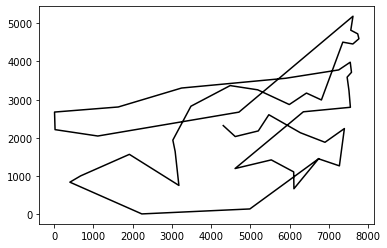

In [11]:
#Run simulated annealing
filename = "att48.tsp" 
cities_list = att48_to_nx3_list(filename) 

tour_best = 1000
tour_new = 2000

T = 110
T_alpha = 0.01
iterations = 22000
    
best_tour_distance, best_solution = simulated_annealing(cities_list, T, T_alpha, iterations)
print("final ", best_tour_distance)
plot_cities(best_solution)